In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

In [3]:
data = pd.read_csv(r"C:\\Users\\Owner\Desktop\celh_feb20.csv")
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2008-08-08,2.00,2.00,2.00,2.00,2.00,5500
1,2008-08-11,2.00,2.00,1.80,2.00,2.00,78600
2,2008-08-12,2.00,2.00,1.80,1.80,1.80,39200
3,2008-08-13,1.80,1.80,1.80,1.80,1.80,15000
4,2008-08-14,1.80,1.80,1.80,1.80,1.80,24300
...,...,...,...,...,...,...,...
2903,2020-02-21,6.38,7.10,6.32,6.40,6.40,839300
2904,2020-02-24,6.31,6.32,6.05,6.19,6.19,342700
2905,2020-02-25,6.22,6.31,5.94,5.98,5.98,399300
2906,2020-02-26,5.99,6.47,5.95,6.44,6.44,412100


In [4]:
data_training = data[data['Date'] < '2019-10-31'].copy()
data_testing = data[data['Date'] >= '2019-10-31'].copy()

In [5]:
data_training = data_training.drop(['Date', 'Adj Close'], axis = 1)

In [6]:
data_training.shape

(2827, 5)

In [7]:
scaler = MinMaxScaler()
data_training = scaler.fit_transform(data_training)
data_training

array([[0.13357401, 0.13357401, 0.17448405, 0.13754647, 0.00209508],
       [0.13357401, 0.13357401, 0.15572233, 0.13754647, 0.02994058],
       [0.13357401, 0.13357401, 0.15572233, 0.12267658, 0.0149322 ],
       ...,
       [0.24548736, 0.24765343, 0.31144465, 0.25130112, 0.08730763],
       [0.24404332, 0.24548736, 0.31050657, 0.2527881 , 0.05911931],
       [0.24765343, 0.24765343, 0.30956848, 0.2527881 , 0.03656864]])

In [8]:
x_train = []
y_train = []

for i in range(100, data_training.shape[0]):
    x_train.append(data_training[i-100:i])
    y_train.append(data_training[i, 0])

x_train = np.array(x_train)
y_train = np.array(y_train)

In [9]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

In [10]:
regressor = Sequential()

regressor.add(LSTM(units = 70, activation = 'relu', return_sequences = True, input_shape = (x_train.shape[1], 5)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 90, activation = 'relu', return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 100, activation = 'relu', return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 110, activation = 'relu'))
regressor.add(Dropout(0.2))

regressor.add(Dense(units = 1))

In [11]:
regressor.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 70)           21280     
_________________________________________________________________
dropout (Dropout)            (None, 100, 70)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 90)           57960     
_________________________________________________________________
dropout_1 (Dropout)          (None, 100, 90)           0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 100, 100)          76400     
_________________________________________________________________
dropout_2 (Dropout)          (None, 100, 100)          0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 110)               9

In [12]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')
regressor.fit(x_train, y_train, epochs = 125, batch_size = 32)

Epoch 1/125
86/86 [==============================] - 25s 290ms/step - loss: 0.0063
Epoch 2/125
86/86 [==============================] - 25s 288ms/step - loss: 0.0021
Epoch 3/125
86/86 [==============================] - 25s 291ms/step - loss: 0.0020
Epoch 4/125
86/86 [==============================] - 25s 287ms/step - loss: 0.0019
Epoch 5/125
86/86 [==============================] - 25s 291ms/step - loss: 0.0017
Epoch 6/125
86/86 [==============================] - 25s 285ms/step - loss: 0.0015
Epoch 7/125
86/86 [==============================] - 25s 289ms/step - loss: 0.0013
Epoch 8/125
86/86 [==============================] - 25s 287ms/step - loss: 0.0012
Epoch 9/125
86/86 [==============================] - 23s 272ms/step - loss: 0.0014
Epoch 10/125
86/86 [==============================] - 24s 280ms/step - loss: 9.8031e-04
Epoch 11/125
86/86 [==============================] - 24s 274ms/step - loss: 0.0011
Epoch 12/125
86/86 [==============================] - 23s 269ms/step - loss: 9.12

In [13]:
data_testing.head()

,Date,Open,High,Low,Close,Adj Close,Volume
2827,2019-10-31,3.53,3.53,3.43,3.52,3.52,118100
2828,2019-11-01,3.50,3.65,3.49,3.60,3.60,128100
2829,2019-11-04,3.62,3.68,3.53,3.65,3.65,248200
2830,2019-11-05,3.68,3.70,3.55,3.56,3.56,153900
2831,2019-11-06,3.56,3.73,3.47,3.70,3.70,230500


In [14]:
past_30_days = data_testing.tail(30)

In [15]:
df = past_30_days.append(data_testing, ignore_index = True)
df = df.drop(['Date', 'Adj Close'], axis = 1)
df.head()

,Open,High,Low,Close,Volume
0,4.85,4.89,4.78,4.83,194700
1,4.77,5.07,4.73,5.05,613000
2,5.10,5.30,5.07,5.24,695600
3,5.29,5.76,5.25,5.74,1113200
4,5.76,6.10,5.66,5.77,1255600


In [16]:
inputs = scaler.transform(df)
inputs

array([[0.33935018, 0.34223827, 0.43527205, 0.34795539, 0.07416578],
       [0.33357401, 0.35523466, 0.43058161, 0.36431227, 0.23350602],
       [0.35740072, 0.37184116, 0.46247655, 0.37843866, 0.26497029],
       [0.37111913, 0.40505415, 0.4793621 , 0.41561338, 0.42404388],
       [0.40505415, 0.42960289, 0.51782364, 0.41784387, 0.47828737],
       [0.40577617, 0.42815884, 0.50844278, 0.43494424, 0.2604373 ],
       [0.42815884, 0.44909747, 0.55065666, 0.4401487 , 0.41436843],
       [0.42238267, 0.43032491, 0.53846154, 0.43271375, 0.140675  ],
       [0.42238267, 0.43610108, 0.51594747, 0.41635688, 0.20147036],
       [0.40288809, 0.40288809, 0.49437148, 0.40446097, 0.19053786],
       [0.39061372, 0.39855596, 0.49906191, 0.40297398, 0.0526817 ],
       [0.38700361, 0.3898917 , 0.47748593, 0.39033457, 0.14875057],
       [0.37833935, 0.39855596, 0.49249531, 0.40594796, 0.0874981 ],
       [0.39566787, 0.39927798, 0.49718574, 0.40148699, 0.17290111],
       [0.39350181, 0.40938628, 0.

In [17]:
x_test = []
y_test = []

for i in range(30, inputs.shape[0]):
    x_test.append(inputs[i-30:i])
    y_test.append(inputs[i,0])
    
x_test = np.array(x_test)
y_test = np.array(y_test)
x_test.shape, y_test.shape

((81, 30, 5), (81,))

In [18]:
x_test.shape

(81, 30, 5)

In [22]:
y_pred = regressor.predict(x_test)

In [23]:
scaler.scale_

array([7.22021661e-02, 7.22021661e-02, 9.38086304e-02, 7.43494424e-02,
       3.80923358e-07])

In [24]:
scale = 1 / 7.22021661e-02
scale

13.849999993282749

In [25]:
y_pred = y_pred * scale 
y_test = y_test * scale

In [26]:
y_pred.shape

(81, 1)

In [27]:
y_pred[0:]

array([[6.2498245],
       [5.696644 ],
       [5.1177135],
       [4.6047235],
       [4.1985383],
       [3.9168637],
       [3.9938498],
       [4.077727 ],
       [4.103857 ],
       [4.0364923],
       [3.9403152],
       [3.8946686],
       [3.8907087],
       [3.882354 ],
       [3.981977 ],
       [4.107854 ],
       [4.3956285],
       [4.542333 ],
       [4.689392 ],
       [4.7864046],
       [4.9811306],
       [4.864607 ],
       [4.7774773],
       [4.644493 ],
       [4.565964 ],
       [4.4921083],
       [4.592375 ],
       [4.8806195],
       [4.80206  ],
       [4.634152 ],
       [4.535764 ],
       [4.4814434],
       [4.449792 ],
       [4.4076505],
       [4.3145385],
       [4.311568 ],
       [4.3531766],
       [4.4603047],
       [4.5055475],
       [4.598841 ],
       [4.6888356],
       [4.790457 ],
       [4.812131 ],
       [4.749644 ],
       [4.6296635],
       [4.529497 ],
       [4.3450193],
       [4.3020306],
       [4.478326 ],
       [4.593125 ],


In [28]:
y_test.shape

(81,)

In [29]:
y_test[0:]

array([3.38, 3.35, 3.47, 3.53, 3.41, 3.59, 3.86, 3.84, 3.95, 3.79, 3.66,
       3.7 , 3.62, 3.66, 3.87, 4.34, 4.45, 4.35, 4.52, 4.79, 4.73, 4.66,
       4.55, 4.51, 4.44, 4.35, 4.59, 4.84, 4.53, 4.45, 4.44, 4.43, 4.29,
       4.29, 4.14, 4.22, 4.16, 4.45, 4.44, 4.53, 4.57, 4.72, 4.68, 4.55,
       4.43, 4.35, 4.12, 4.3 , 4.55, 4.47, 4.65, 4.7 , 4.62, 4.95, 5.14,
       5.61, 5.62, 5.93, 5.85, 5.85, 5.58, 5.41, 5.36, 5.24, 5.48, 5.45,
       5.55, 5.6 , 5.54, 5.76, 5.79, 5.87, 5.77, 5.99, 6.09, 6.  , 6.23,
       6.16, 6.07, 5.84, 6.21])

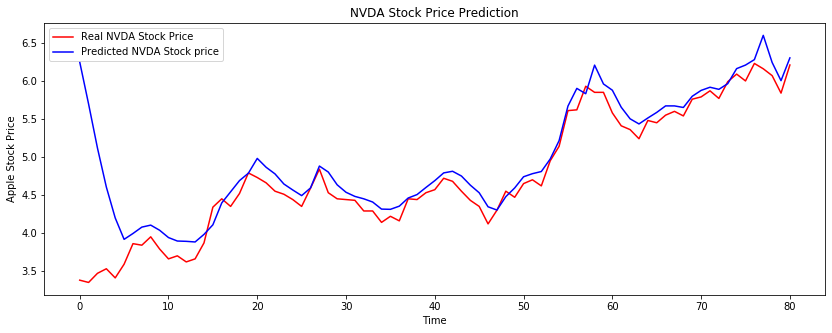

In [30]:
plt.figure(figsize = (14,5))
plt.plot(y_test, color = 'red', label = 'Real NVDA Stock Price')
plt.plot(y_pred, color = 'blue', label = 'Predicted NVDA Stock price')
plt.title('NVDA Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Apple Stock Price')
plt.legend()
plt.show()